In [1]:
import pandas as pd

In [2]:
wine_data = pd.read_csv("data/winequality-red.csv", sep=";")

In [59]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
import matplotlib.pyplot as plt

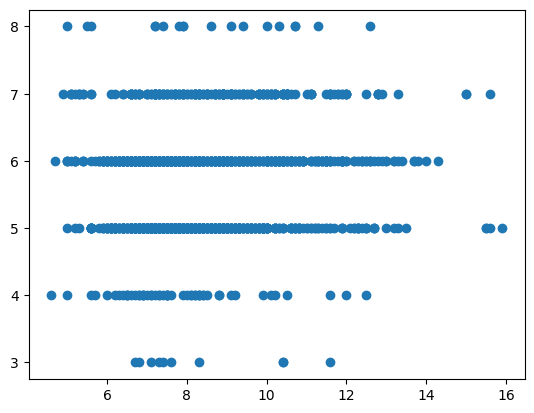

In [8]:
plt.scatter(wine_data['fixed acidity'], wine_data['quality'])

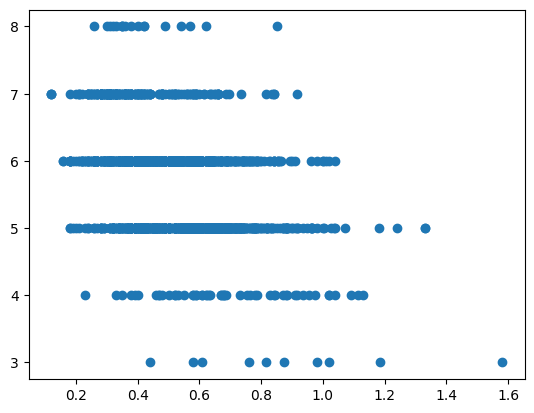

In [9]:
plt.scatter(wine_data['volatile acidity'], wine_data['quality'])

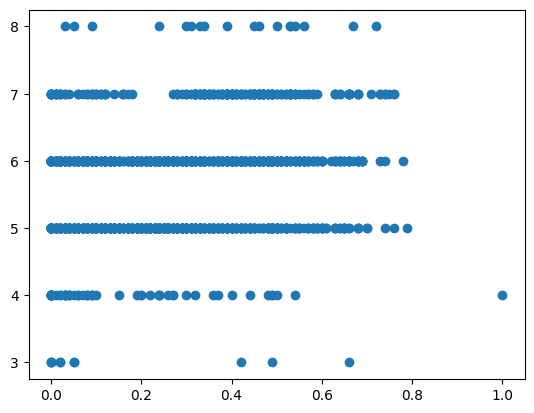

In [10]:
plt.scatter(wine_data['citric acid'], wine_data['quality'])

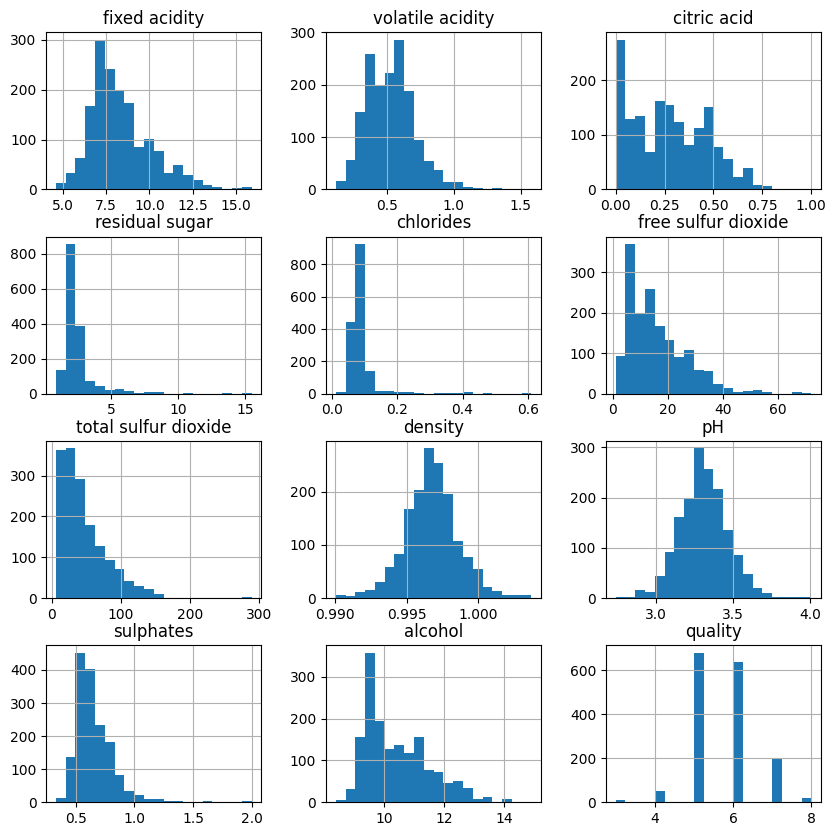

In [100]:
wine_data.hist(bins=20, figsize=(10, 10))
plt.show()

In [93]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

In [102]:
#Cleaning our dataset

#Remove the total sulfur dioxide column (This is optional)


wine_data = wine_data.drop('total sulfur dioxide', axis=1)

#Create a new column called best quality which has the output for either 1 if quality is > than 5 or 0
wine_data['best quality'] = [1 if x > 5 else 0 for x in wine_data.quality]

In [103]:
#Creating a Object of Linear Regression Model

In [117]:
wine_model = LogisticRegression()

In [118]:
#X features will be everything except quality and best quality field
X = wine_data.drop(['quality', 'best quality'], axis=1)
#Y output will be best qulaity
Y = wine_data['best quality']

X_train = X[0:1119]
Y_train = Y[0:1119]

X_test = X[1119:]
Y_test = Y[1119:]


In [119]:
wine_model.fit(X_train, Y_train)

C:\Users\vishn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [120]:
print("Intercept:",wine_model_logistic.intercept_ ,"\nCoefficients:",wine_model_logistic.coef_)

Intercept: [-7.56287265] 
Coefficients: [[ 0.16676892 -3.26665471 -1.87046418 -0.04629204 -1.05787089 -0.01843128
  -1.90189449 -0.41596635  1.89140841  1.07556021]]


In [121]:
#Finding the training and testing accuracy

In [122]:
train_score=wine_model.score(X_train,Y_train)
test_score=wine_model.score(X_test,Y_test)
print('Train Score (R-Squared): ',train_score)
print('Test Score (R-Squared)',test_score)


Train Score (R-Squared):  0.7390527256478999
Test Score (R-Squared) 0.7458333333333333


In [123]:
train_score=wine_model_logistic.score(X_train,Y_train)
test_score=wine_model_logistic.score(X_test,Y_test)
print('Train Score (R-Squared): ',train_score)
print('Test Score (R-Squared)',test_score)


Train Score (R-Squared):  0.7390527256478999
Test Score (R-Squared) 0.7458333333333333


In [124]:
Y_train_predicted = wine_model.predict(X_train)
Y_train_predicted_df = pd.DataFrame(Y_train_predicted, columns = ['quality'])
Y_train.index[0:10]

RangeIndex(start=0, stop=10, step=1)

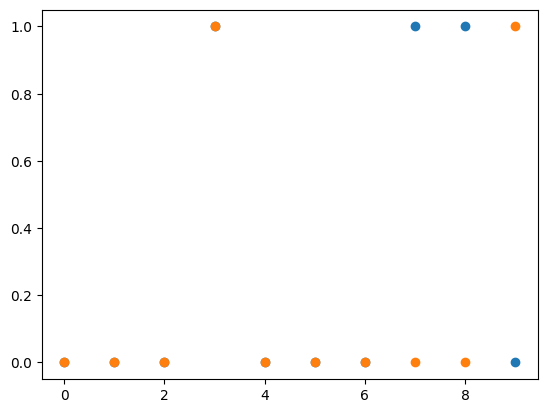

In [126]:
fig,ax=plt.subplots()
ax.scatter(Y_train.index[0:10], Y_train[0:10])
ax.scatter(Y_train_predicted_df.index[0:10], Y_train_predicted[0:10])
plt.show()

In [145]:
Y_test_predicted = wine_model.predict(X_test)
Y_test_predicted_df = pd.DataFrame(Y_test_predicted, columns = ['quality'])
Y_test_predicted_df.set_index(Y_test.index,  inplace=True)

In [146]:
Y_test_predicted_df

,quality
1119,1
1120,1
1121,1
1122,1
1123,1
...,...
1594,0
1595,1
1596,1
1597,0


C:\Users\vishn\AppData\Local\Temp\ipykernel_18124\3391566948.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax.scatter(Y_test.index[0:20], Y_test[0:20])


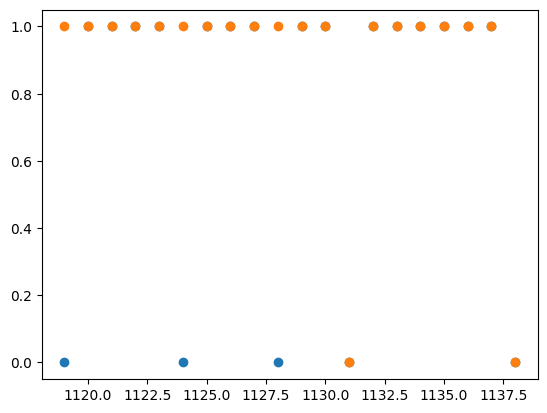

In [149]:
fig,ax=plt.subplots()
ax.scatter(Y_test.index[0:20], Y_test[0:20])
ax.scatter(Y_test_predicted_df.index[0:20], Y_test_predicted[0:20])
plt.show()


In [150]:
#Now that Model has been created let us save the model 

In [152]:
import pickle

In [153]:
#pickle is library to store the model 

In [154]:
model_name = "wine_model.pkl"

In [155]:
with open(model_name, 'wb') as file:
    pickle.dump(wine_model, file)

In [156]:
wine_model.predict([[1,2,3,2,1,0.2,2,1,3,2]])

C:\Users\vishn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [158]:
with open(model_name, 'rb') as file:
    model = pickle.load(file)